In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

In [4]:
df=pd.read_csv('audit_risk.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'audit_risk.csv'

In [ ]:
df.head()

In [4]:
df.shape

(776, 27)

In [5]:
df.dtypes

Sector_score      float64
LOCATION_ID        object
PARA_A            float64
Score_A           float64
Risk_A            float64
PARA_B            float64
Score_B           float64
Risk_B            float64
TOTAL             float64
numbers           float64
Score_B.1         float64
Risk_C            float64
Money_Value       float64
Score_MV          float64
Risk_D            float64
District_Loss       int64
PROB              float64
RiSk_E            float64
History             int64
Prob              float64
Risk_F            float64
Score             float64
Inherent_Risk     float64
CONTROL_RISK      float64
Detection_Risk    float64
Audit_Risk        float64
Risk                int64
dtype: object

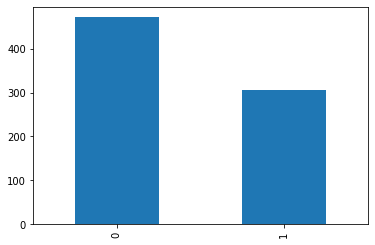

In [6]:
df.Risk.value_counts().plot(kind="bar")

In [7]:
import seaborn as sns

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:1126: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:1127: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
Sector_score,1.00,-0.22,-0.43,-0.22,-0.13,-0.22,-0.13,-0.15,-0.15,-0.17,-0.17,-0.12,-0.32,-0.12,-0.11,-0.09,-0.13,-0.11,-0.14,-0.10,-0.34,-0.17,-0.15,nan,-0.09,-0.39
PARA_A,-0.22,1.00,0.50,1.00,0.16,0.36,0.16,0.27,0.13,0.14,0.14,0.45,0.29,0.45,0.13,0.04,0.12,0.12,0.17,0.10,0.43,0.48,0.15,nan,0.22,0.38
Score_A,-0.43,0.50,1.00,0.50,0.25,0.57,0.25,0.30,0.24,0.27,0.27,0.21,0.48,0.20,0.09,0.09,0.10,0.18,0.27,0.15,0.72,0.32,0.17,nan,0.20,0.62
Risk_A,-0.22,1.00,0.50,1.00,0.17,0.36,0.17,0.27,0.14,0.14,0.14,0.45,0.29,0.45,0.13,0.04,0.12,0.12,0.18,0.11,0.43,0.48,0.15,nan,0.22,0.39
PARA_B,-0.13,0.16,0.25,0.17,1.00,0.35,1.00,0.99,0.21,0.23,0.22,0.13,0.31,0.12,0.08,0.04,0.08,0.20,0.32,0.20,0.40,0.65,0.19,nan,0.89,0.26
Score_B,-0.22,0.36,0.57,0.36,0.35,1.00,0.35,0.38,0.28,0.31,0.30,0.21,0.57,0.20,-0.00,0.09,0.02,0.20,0.31,0.17,0.90,0.37,0.13,nan,0.21,0.64
Risk_B,-0.13,0.16,0.25,0.17,1.00,0.35,1.00,0.99,0.21,0.23,0.22,0.13,0.31,0.12,0.08,0.04,0.08,0.20,0.32,0.20,0.40,0.65,0.19,nan,0.89,0.26
TOTAL,-0.15,0.27,0.30,0.27,0.99,0.38,0.99,1.00,0.22,0.24,0.23,0.17,0.34,0.17,0.09,0.05,0.09,0.21,0.33,0.20,0.43,0.69,0.20,nan,0.89,0.29
numbers,-0.15,0.13,0.24,0.14,0.21,0.28,0.21,0.22,1.00,0.91,0.96,0.19,0.45,0.19,0.13,0.04,0.14,0.20,0.21,0.20,0.50,0.27,0.23,nan,0.22,0.31
Score_B.1,-0.17,0.14,0.27,0.14,0.23,0.31,0.23,0.24,0.91,1.00,0.99,0.22,0.51,0.22,0.15,0.04,0.16,0.23,0.25,0.22,0.57,0.31,0.26,nan,0.26,0.35


In [8]:
df.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [9]:
df=df.dropna()

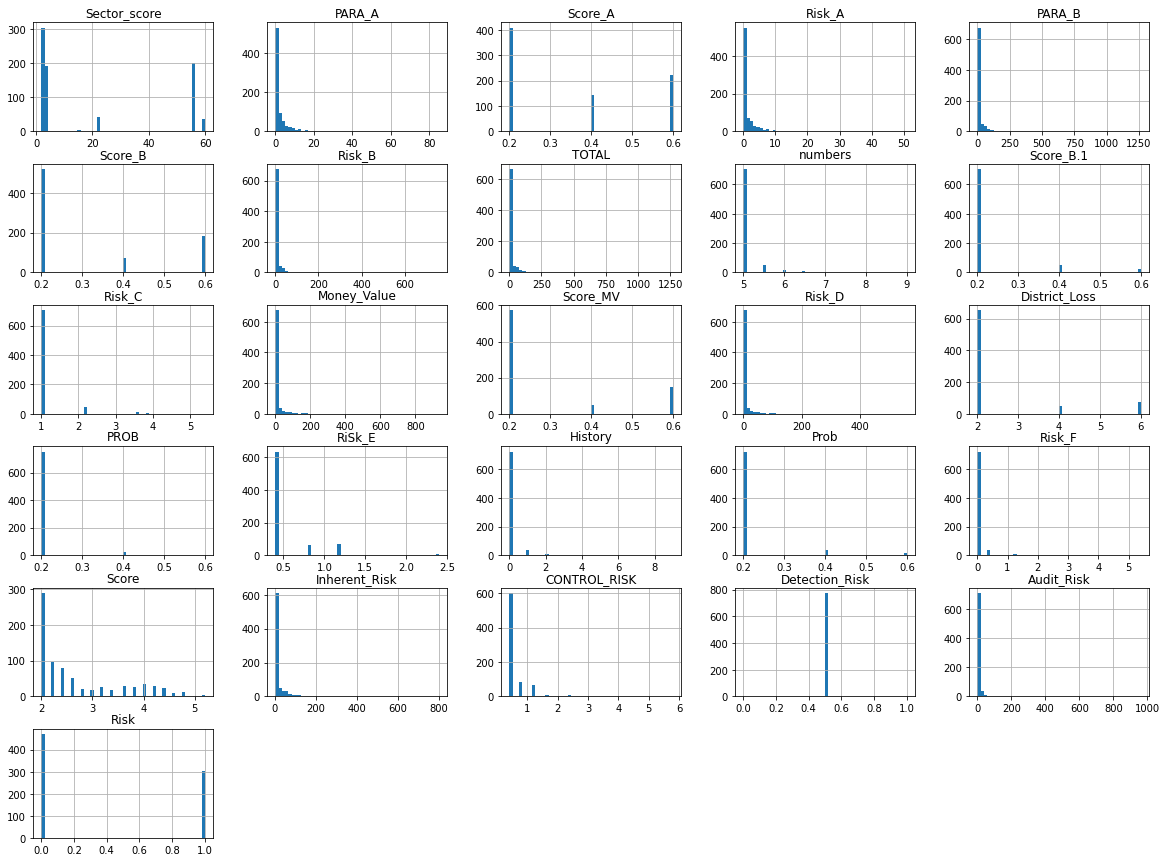

In [10]:
df.hist(bins=50, figsize=(20,15))
plt.show();

In [11]:
df=df.drop(['LOCATION_ID'], axis = 1)

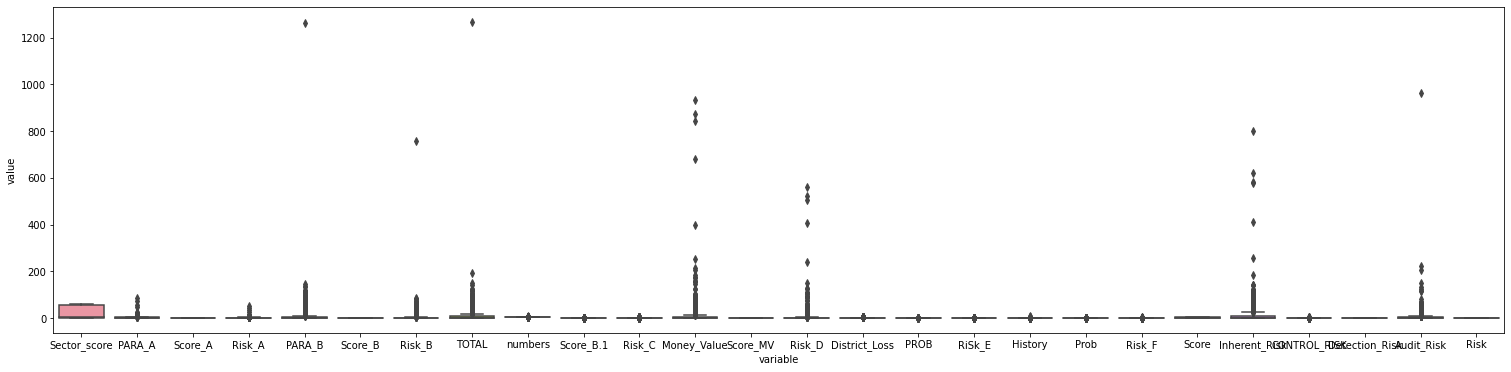

In [12]:
fig, ax = plt.subplots(figsize=(26, 6))
sns.boxplot(x="variable", y="value", data=pd.melt(df),ax=ax)
plt.show()

In [13]:
standard_deviations = 3
df[df.apply(lambda x: np.abs(x - x.mean()) / x.std() < standard_deviations)
   .all(axis=1)]

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk


In [14]:
df.Risk=df.Risk.astype(str)
val = df.Risk.value_counts()

In [15]:
df.shape

(775, 26)

In [16]:
data = df.copy()

In [17]:
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

In [18]:
input = df.loc[:, df.columns != 'Risk']
output= df['Risk'] 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(input,output,test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=250, random_state=42)
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=250, random_state=42)

In [19]:
y_pred_test = forest.predict(X_test)
y_pred_train = forest.predict(X_train)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test, target_names=val.keys()))
print(classification_report(y_train, y_pred_train, target_names=val.keys()))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        95
           1       1.00      0.98      0.99        60

    accuracy                           0.99       155
   macro avg       0.99      0.99      0.99       155
weighted avg       0.99      0.99      0.99       155

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       375
           1       1.00      1.00      1.00       245

    accuracy                           1.00       620
   macro avg       1.00      1.00      1.00       620
weighted avg       1.00      1.00      1.00       620



In [21]:
y_prob_test = list(forest.predict_proba(X_test))
y_prob_train = list(forest.predict_proba(X_train))

In [22]:
y_prob_train.extend(y_prob_test)

In [23]:
prob_class = list(val.keys())

In [24]:
new_class = []
for prob in y_prob_train:
    str1 = str(round(prob[0],1))+'-'+prob_class[0]+"-"+str(round(prob[1],1))+"-"+prob_class[1]
    new_class.append(str1)

In [25]:
data['new_class'] = new_class

data.head()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk,new_class
0,3.89,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,1.0,3.38,0.2,0.676,2,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1,0.0-0-1.0-1
1,3.89,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,1.0,0.94,0.2,0.188,2,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0,1.0-0-0.0-1
2,3.89,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0,1.0-0-0.0-1
3,3.89,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,0.6,3.6,11.75,0.6,7.050,2,0.2,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1,1.0-0-0.0-1
4,3.89,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0,1.0-0-0.0-1


In [26]:
def evaluate(model):
    print("Train Accuracy :", accuracy_score(y_train, model.predict(x_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, model.predict(x_train)))
    print("Train classification report")
    print(classification_report(y_train, model.predict(x_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, model.predict(x_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, model.predict(x_test)))
    print("Test classification report")
    print(classification_report(y_test, model.predict(x_test)))


In [27]:
data.drop('Risk',axis=1,inplace=True)

for col_name in data.columns:
    if(data[col_name].dtype == 'object'):
        data[col_name]= data[col_name].astype('category')
        data[col_name] = data[col_name].cat.codes

data.head()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,new_class
0,3.89,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,1.0,3.38,0.2,0.676,2,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,0
1,3.89,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,1.0,0.94,0.2,0.188,2,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,6
2,3.89,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,6
3,3.89,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,0.6,3.6,11.75,0.6,7.050,2,0.2,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,6
4,3.89,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,6


In [28]:
x = data.loc[:, data.columns != 'new_class']
y= data['new_class']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(x)

from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(scaled,y,test_size=0.80,random_state=0)

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 2)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [29]:
from sklearn.metrics import confusion_matrix
test_pred = dtree.predict(x_test)
cm = confusion_matrix(y_test, test_pred)

cm

array([[ 54,   0,   0,   0,   0,   0, 175],
       [  1,   0,   0,   0,   0,   0,   4],
       [  0,   0,   0,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   0,   3],
       [  1,   0,   0,   0,   0,   0,   6],
       [ 83,   0,   0,   0,   0,   0, 291]])

In [30]:
print(classification_report(y_test, test_pred))


              precision    recall  f1-score   support

           0       0.39      0.24      0.29       229
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         7
           6       0.60      0.78      0.68       374

    accuracy                           0.56       620
   macro avg       0.14      0.14      0.14       620
weighted avg       0.51      0.56      0.52       620



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=dtree, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(max_depth=2), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [32]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5)

In [33]:
evaluate(grid_search.best_estimator_)

Train Accuracy : 0.7741935483870968
Train Confusion Matrix:
[[52  0  0 17]
 [ 0  0  0  1]
 [ 0  0  0  1]
 [16  0  0 68]]
Train classification report
              precision    recall  f1-score   support

           0       0.76      0.75      0.76        69
           1       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.78      0.81      0.80        84

    accuracy                           0.77       155
   macro avg       0.39      0.39      0.39       155
weighted avg       0.76      0.77      0.77       155

--------------------------------------------------
Test Accuracy : 0.5048387096774194
Test Confusion Matrix:
[[102   0   0   0   0   0 127]
 [  1   0   0   0   0   0   4]
 [  0   0   0   0   0   0   1]
 [  1   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0]
 [  2   0   0   0   0   0   5]
 [163   0   0   0   0   0 211]]
Test classification report
              precision    recall  f1-score   support

       

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [37]:
import tabulate
conclusion = [['Model', 'Precision','Recall', 'F1score', 'Accuracy'],
              ['RandomForest', 0.99, 0.99, 0.99, 0.99],
              ['DecisionTree', 0.14, 0.14 ,0.14, 0.56],
              ['DecisionTree after hyperparamter tunning', 0.14, 0.14 ,0.14, 0.50]
]
print(tabulate.tabulate(conclusion, tablefmt='fancy_grid'))


╒══════════════════════════════════════════╤═══════════╤════════╤═════════╤══════════╕
│ Model                                    │ Precision │ Recall │ F1score │ Accuracy │
├──────────────────────────────────────────┼───────────┼────────┼─────────┼──────────┤
│ RandomForest                             │ 0.99      │ 0.99   │ 0.99    │ 0.99     │
├──────────────────────────────────────────┼───────────┼────────┼─────────┼──────────┤
│ DecisionTree                             │ 0.14      │ 0.14   │ 0.14    │ 0.56     │
├──────────────────────────────────────────┼───────────┼────────┼─────────┼──────────┤
│ DecisionTree after hyperparamter tunning │ 0.14      │ 0.14   │ 0.14    │ 0.5      │
╘══════════════════════════════════════════╧═══════════╧════════╧═════════╧══════════╛


In [40]:
Rf=[ 0.99, 0.99, 0.99, 0.99]
DT= [ 0.14, 0.14 ,0.14, 0.56]
DT_tune=[ 0.14, 0.14 ,0.14, 0.50]

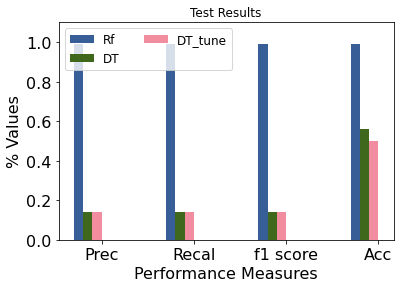

<Figure size 432x288 with 0 Axes>

In [41]:
import matplotlib.pyplot as plt
import numpy as np


width = 0.1

r1 = np.arange(4)
r4 = [i + width for i in r1]
r5 = [i + width for i in r4]

plt.bar(r1, Rf, color='#375e97', width=width, label='Rf')


plt.bar(r4, DT, color='#3f681c', width=width, label='DT')
plt.bar(r5, DT_tune, color='#f18d9e', width=width, label='DT_tune')

plt.ylim(top=1.1)  # adjust the top leaving bottom unchanged
plt.xlabel('Performance Measures', fontsize=16)
plt.ylabel('% Values', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tick_params(axis='both', which='minor', labelsize=16)
plt.title('Test Results')

plt.xticks([r + 2.5*width for r in range(4)], [ 'Prec', 'Recal','f1 score','Acc'])

plt.legend(loc=2 , ncol=2, fontsize=12)
plt.show()

plt.savefig("output.jpg")